# 05. Exploratory Data Analysis

### Importando as bibliotecas

In [20]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts

### Lendo o dataset tratado e visualizando o overview atual

In [2]:
df = pd.read_csv(consts.DATASET_LEAN, parse_dates=True, index_col='Date') # Armazenando o dataset em uma variável

In [4]:
pd.options.display.float_format = '{:.2f}'.format # Formatando os dados do dataset com 2 casas decimais

In [5]:
df # Exbindo uma visão geral do dataset

,Open,High,Low,Close,Volume,Daily Variation
Date,,,,,,
2023-11-28 00:00:00-05:00,188.85,190.15,188.48,189.47,38415400,0.00
2023-11-29 00:00:00-05:00,189.97,191.15,188.05,188.45,43014200,-0.01
2023-11-30 00:00:00-05:00,188.91,189.39,187.27,189.02,48794400,0.00
2023-12-01 00:00:00-05:00,189.40,190.63,188.31,190.31,45679300,0.01
2023-12-04 00:00:00-05:00,189.05,189.12,186.54,188.51,43389500,-0.01
...,...,...,...,...,...,...
2024-11-19 00:00:00-05:00,226.98,230.16,226.66,228.28,36211800,0.00
2024-11-20 00:00:00-05:00,228.06,229.93,225.89,229.00,35169600,0.00
2024-11-21 00:00:00-05:00,228.88,230.16,225.71,228.52,42108300,-0.00


In [6]:
df.shape # Visualizando a quantidade de linhas e colunas do dataset

(251, 6)

In [7]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2023-11-28 00:00:00-05:00 to 2024-11-25 00:00:00-05:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             251 non-null    float64
 1   High             251 non-null    float64
 2   Low              251 non-null    float64
 3   Close            251 non-null    float64
 4   Volume           251 non-null    int64  
 5   Daily Variation  251 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


In [8]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,Open,High,Low,Close,Volume,Daily Variation
count,251.00,251.00,251.00,251.00,251.00,251.00
mean,201.42,203.25,199.69,201.57,57493972.46,0.00
std,22.10,22.33,21.79,22.14,30463897.50,0.01
min,164.75,165.80,163.49,164.41,17970087.00,-0.05
25%,182.96,184.52,181.65,183.42,42169650.00,-0.01
50%,194.47,196.06,193.39,194.23,50190600.00,0.00
75%,224.33,226.11,222.55,224.26,63943250.00,0.01
max,235.95,237.23,234.19,236.22,318679900.00,0.07


In [10]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Open               0
High               0
Low                0
Close              0
Volume             0
Daily Variation    0
dtype: int64

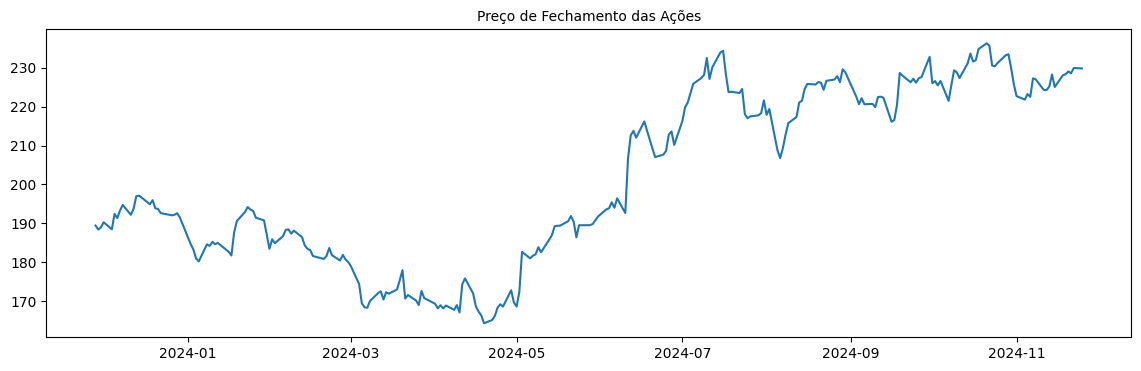

In [17]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(df['Close'])
plt.title('Preço de Fechamento das Ações', size = 10)
plt.show()

In [18]:
retorno_diario = df['Close'].pct_change().dropna() # Criando um dataset com as variações diárias

retorno_diario_acumulado = (1 - retorno_diario).cumprod() - 1

retorno_diario_acumulado.max()

0.13442287293430621

In [21]:
media_retorno_diario = np.mean(retorno_diario)
desvio_retorno_diario = np.std(retorno_diario)

print('Média do Retorno de Fechamento:', media_retorno_diario)
print('Desvio Padrão do Retorno de Fechamento:', desvio_retorno_diario)

Média do Retorno de Fechamento: 0.0008719195335295997
Desvio Padrão do Retorno de Fechamento: 0.014198137341769298


In [23]:
print('Retorno Médio Anualizado de Fechamento:', (1 + media_retorno_diario) ** 252 - 1)
print('Desvio Padrão Anualizado de Fechamento:', desvio_retorno_diario *np.sqrt(252))

Retorno Médio Anualizado de Fechamento: 0.24561326054610433
Desvio Padrão Anualizado de Fechamento: 0.22538844291996746


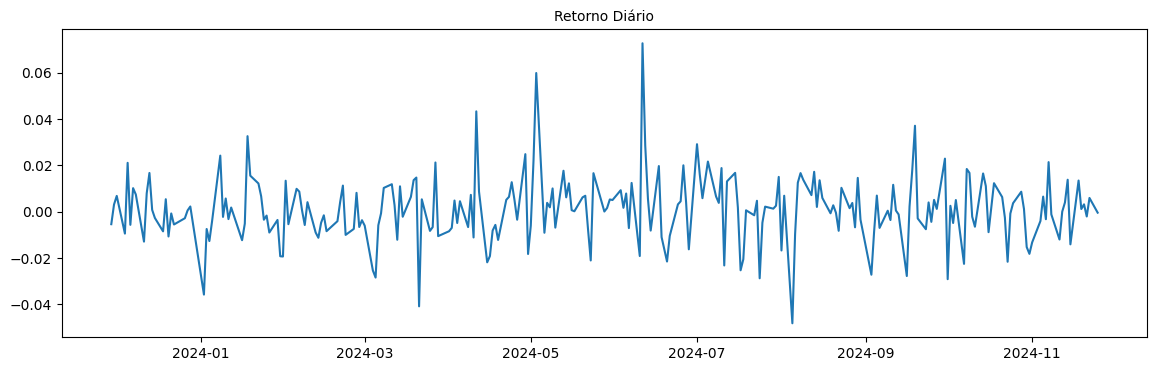

In [24]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(retorno_diario)
plt.title('Retorno Diário', size = 10)
plt.show()

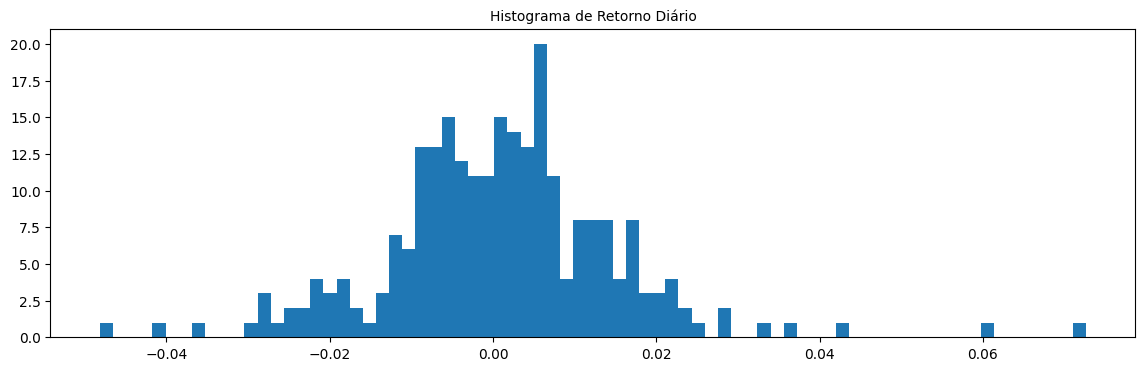

In [26]:
fig, ax = plt.subplots(figsize=(14,4))
plt.hist(retorno_diario, bins=75)
plt.title('Histograma de Retorno Diário', size = 10)
plt.show()

In [27]:
log_retorno_diario = (np.log(df['Close']) - np.log(df['Close']).shift(-1)).dropna()

log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

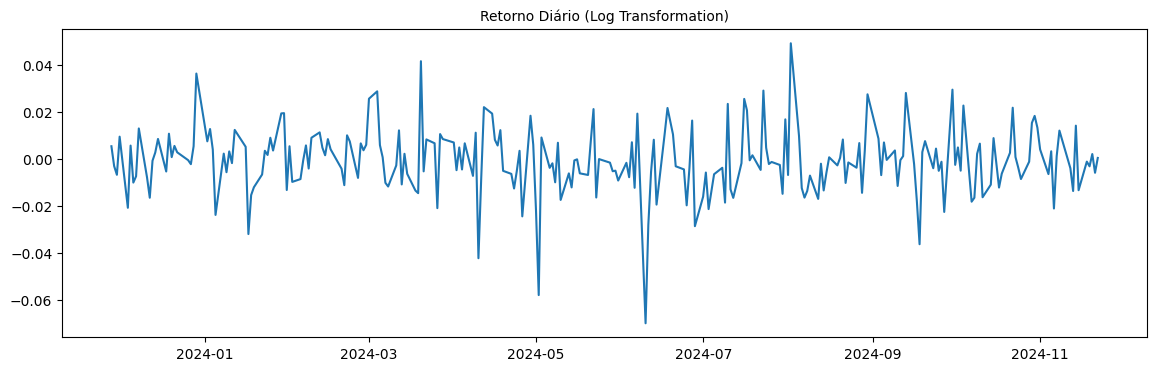

In [28]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(log_retorno_diario)
plt.title('Retorno Diário (Log Transformation)', size = 10)
plt.show()

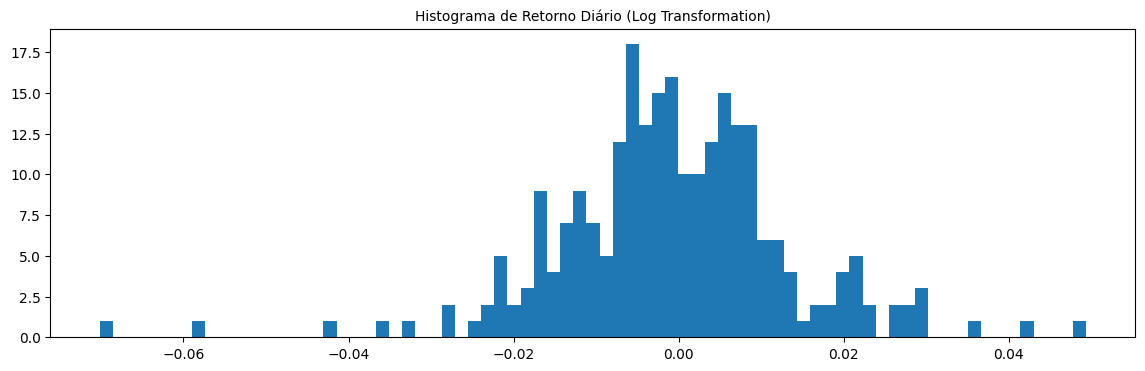

In [29]:
fig, ax = plt.subplots(figsize=(14,4))
plt.hist(log_retorno_diario, bins=75)
plt.title('Histograma de Retorno Diário (Log Transformation)', size = 10)
plt.show()

In [30]:
var_level = 95
var = np.percentile(log_retorno_diario, 100-var_level)
print(f'Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.')
print('VAR 95%:', var)

Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.
VAR 95%: -0.02107662059829778


In [31]:
var * np.sqrt(5)

-0.047128756393766125

In [32]:
var_level = 95
var = np.percentile(log_retorno_diario, 100-var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print(f'Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.')
print('CVAR 95%:', cvar)

Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.
CVAR 95%: -0.03317214117850268


### Simulação de Monte Carlo

In [ ]:
dias_posteriores = 180

simulacoes = 2500

ultimo_preco = 229.77

results = np.empty((simulacoes, dias_posteriores))

for s in range(simulacoes):
    
    random_returns = 1 + np.random.normal(
        loc = log_media_retorno_diario, 
        scale = log_desvio_retorno_diario,
        size = dias_posteriores
    )

    result = ultimo_preco * (random_returns.cumprod())

    results[s, :] = result

In [34]:
index = pd.date_range('2024-11-26', periods=dias_posteriores, freq='D')
resultados = pd.DataFrame(results.T, index=index)
media_resultados = resultados.apply('mean', axis=1)

TypeError: '<' not supported between instances of 'Timestamp' and 'str'

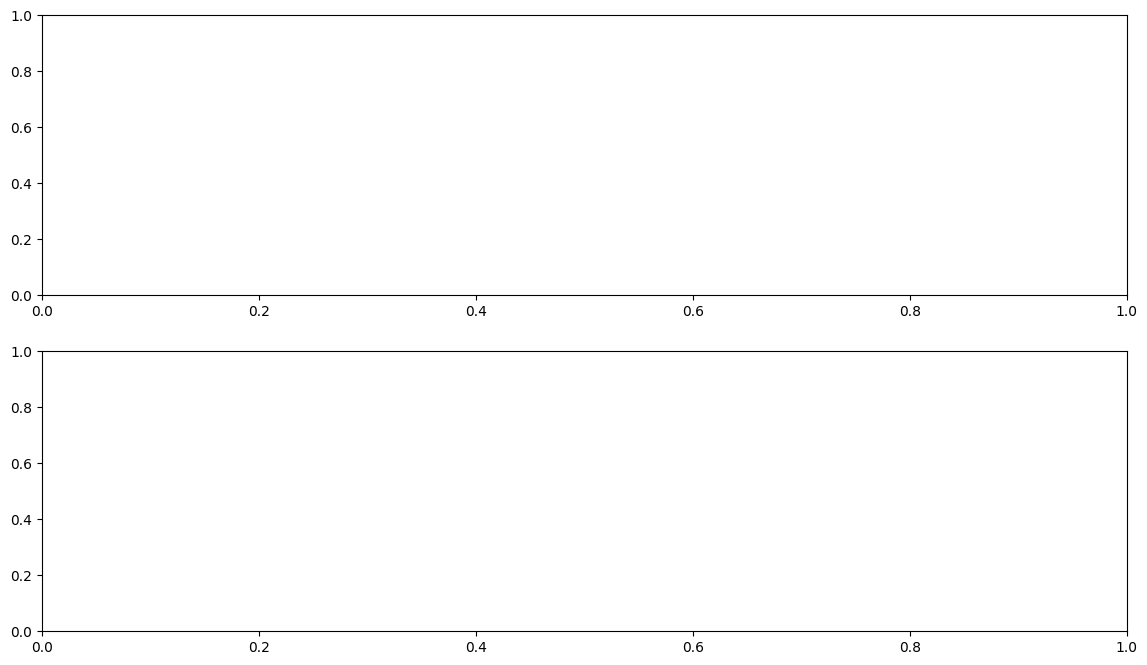

In [ ]:
fig, ax = plt.subplots(figsize=(14,8), nrows=2, ncols=1)

ax[0].plot(df['Close'][:'2025-05-31'])
ax[0].plot(resultados)
ax[0].axhline(229.77, c='orange')
ax[0].set_title(f'Monte Carlo {simulacoes} Simulações', size=10)
ax[0].legend(['Preço Histórico', 'Último Preço = 229.77'])

ax[1].plot(df['Close'][:'2025-05-31'])
ax[1].plot(resultados.apply('mean', axis=1), lw=2)
ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))), lw=2, linestyle = 'dotted', c='gray')
ax[1].plot(media_resultados, lw=2, c='orange')
ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))), lw=2, linestyle = 'dotted', c='gray')
ax[1].set_title(f'Resultado Médio Monte Carlo {simulacoes} Simulações', size=10)
ax[1].legend(['Preço', 'Previsão Média', '2x Desvio Padrão'])

plt.show()